# DELIVERY APP 

## 1. Context

The data checked present a lot of variables with blank data. The next strategies are going to be implemented on the data:

+ Imputing the mean or mode value for the blank values: For the variables  'STORE_CATEGORY','VEHICLE_TYPE' Since, in this categories,the is an actual probability that the values are related to the median or mode.
+ Drop rows of the null values: 'LAT','LNG','POLYGON_SIZE'. The number of rows are low and can be dropped.
+ Put the fixed value 'FALSE' in 'USE_CREDIT': Since this is a boolean variable, and the blanks values mean False
+ Put the fixed value of 0: For the variables T04,T05,T06, and rappi_amount because these variabkes are time variables and currency, in which if they don't have value means that for that field, it doesn't apply the variable.
+ Finally, the variable % completed orders is in varchar and is going to be changed to decimal value

In [2]:
# Displaying at least 50 columns
pd.set_option('display.max_columns',50)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# @hidden_cell
delivery = pd.read_csv('.//ml_dlv_1.csv')


In the next piece of code is going to be presented the data about a company that has as goal to deliver different products to the clients in the countries that it operates. Now it is being defined the fields that are included in the dataset.


| Field | Concept |
|------|------|
| country  | There are going to three countries in the dataset |
|district_name|Name of the village in the city|
|date|day when the order was commanded|
|weekday|name of the day when the order was commanded|
|user_total_orders|number of previous orders that the client had ordered before|
|completed orders user|Percentage of the orders that actually were well delivered to the client|
|payment_method|Defines the way in which the client pays for the order|
|order_value|value of the order|
|item_count|number of elements that the basket of the order have|
|city|location of the order|
|partner|Store or brand that provided the items requested by the client|
|picking_time|Lead  time that the clerk takes to gather all the items of the order. |
|cashier_time|Time take by the cashier to generate the bill|
|requesting_transport_time|Time that the clerk takes to ask for a courier to pick up the basket.|
|vehicle_type|Type of vehicle that the courier have|
|store_category|Macro classification of the partner|
|out_of_stock|Number of elements that were reported to be out of stock in the store.|
|order_wrong|Indicades if the order was sucessfully delivered or not|
|tag_cancel|Indicades if the order was cancelled or not.|
|distance_km|Total number of km that the delivery had from the partner to the client|
|use_credit|Indicades if the order was payed with some promotion code|
|hora|Have the hour in which the order was issued|
|polygon_size|Defines the km of coverage of the partner|
|cashback|Provides the total amount of promotion code value in possess of the client|



In [5]:
#| output: true

delivery.head(3)

,country,district_name,date,weekday,user_total_orders,% completed orders user,payment_method,order_value,item_count,city,...,vehicle_type,store_category,out_of_stock,order_wrong,tag_cancel,distance_km,use_credit,hora,polygon_size,cashback
0,Llaqta_1,MA_1,2023-06-30 00:00:00,Friday,111,95.50 %,revol_pay,25.407407,2.0,Maule,...,Bicycle,Licours Shop,0,False,False,2.0,NaN,23,NaN,NaN
1,Llaqta_1,MA_2,2023-06-27 00:00:00,Tuesday,4,50.00 %,cc-N/A,43.049383,1.0,Maule,...,Motorcycle,E-commerce,0,True,True,3.0,NaN,0,NaN,NaN
2,Llaqta_1,MA_3,2023-06-27 00:00:00,Tuesday,208,99.04 %,cc-credit,119.438889,11.0,Maule,...,Motorcycle,NaN,0,False,False,4.0,NaN,12,NaN,NaN


In [6]:
# Checking null values
delivery.isnull().sum()

country                          0
district_name                    0
date                             0
weekday                          0
user_total_orders                0
% completed orders user          0
payment_method                   0
order_value                      0
item_count                     398
city                             0
partner                          0
picking_time                 11149
cashier_time                  1191
requesting_transport_time    30258
vehicle_type                   994
store_category               18125
out_of_stock                     0
order_wrong                      0
tag_cancel                       0
distance_km                      2
use_credit                   54448
hora                             0
polygon_size                   226
cashback                     54448
dtype: int64

In [7]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    62382 non-null  object 
 1   district_name              62382 non-null  object 
 2   date                       62382 non-null  object 
 3   weekday                    62382 non-null  object 
 4   user_total_orders          62382 non-null  int64  
 5   % completed orders user    62382 non-null  object 
 6   payment_method             62382 non-null  object 
 7   order_value                62382 non-null  float64
 8   item_count                 61984 non-null  float64
 9   city                       62382 non-null  object 
 10  partner                    62382 non-null  object 
 11  picking_time               51233 non-null  float64
 12  cashier_time               61191 non-null  float64
 13  requesting_transport_time  32124 non-null  flo

In [8]:
delivery[['vehicle_type', 'store_category', 'distance_km', 'out_of_stock']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle_type    61388 non-null  object 
 1   store_category  44257 non-null  object 
 2   distance_km     62380 non-null  float64
 3   out_of_stock    62382 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [9]:
# Removing % label
delivery['% completed orders user']=delivery['% completed orders user'].str.replace('%',' ')
delivery['% completed orders user']=delivery['% completed orders user'].astype('float')
delivery['% completed orders user']=delivery['% completed orders user']/100


In [11]:
# Remove missing values
delivery.dropna(subset=['vehicle_type'],inplace=True)

In [14]:
#Imputing values of mode and mean for the variables

mode_ps = delivery['polygon_size'].mode()[0]
delivery['polygon_size'].fillna(mode_ps, inplace=True)


In [15]:
mean_ic = delivery['item_count'].mean()
delivery['item_count'].fillna(mean_ic, inplace=True)



In [16]:
mode_sc = delivery['store_category'].mode()[0]
delivery['store_category'].fillna(mode_sc, inplace=True)


In [17]:
# Replace missing values
delivery.fillna({'picking_time': 0, 'cashier_time': 0, 'requesting_transport_time':0, 'cashback':0}, inplace=True)

In [18]:
# Replace missing values
delivery.fillna({'use_credit': False},inplace=True)

In [19]:
#$0 could be relate to bad order
zero_count = (delivery['order_value'] == 0).sum()
print(zero_count)

28


In [20]:
# Check duplicate values
dup_value = delivery.duplicated().sum()
print(dup_value)

2


In [26]:
# Removing negative values
negative_cols = ['user_total_orders', 'item_count', 'picking_time', 'cashier_time', 'requesting_transport_time',
                 'out_of_stock', 'distance_km', 'hora', 'polygon_size', 'cashback']

# Create a mask that identifies rows with any negative value in the specified columns
negative_mask = delivery[negative_cols].lt(0).any(axis=1)

# Use the mask to filter out rows with negative values
df = delivery[~negative_mask]

In [27]:
df.head(3)

,country,district_name,date,weekday,user_total_orders,% completed orders user,payment_method,order_value,item_count,city,...,vehicle_type,store_category,out_of_stock,order_wrong,tag_cancel,distance_km,use_credit,hora,polygon_size,cashback
0,Llaqta_1,MA_1,2023-06-30 00:00:00,Friday,111,0.9550,revol_pay,25.407407,2.0,Maule,...,Bicycle,Licours Shop,0,False,False,2.0,False,23,3.0,0.0
1,Llaqta_1,MA_2,2023-06-27 00:00:00,Tuesday,4,0.5000,cc-N/A,43.049383,1.0,Maule,...,Motorcycle,E-commerce,0,True,True,3.0,False,0,3.0,0.0
2,Llaqta_1,MA_3,2023-06-27 00:00:00,Tuesday,208,0.9904,cc-credit,119.438889,11.0,Maule,...,Motorcycle,Convenient Store,0,False,False,4.0,False,12,3.0,0.0


In [28]:
# Separating quantiative & Categorical variables
df_cat = df.select_dtypes(include=['object','bool'])
df_quan = df.select_dtypes(exclude=['object','bool'])

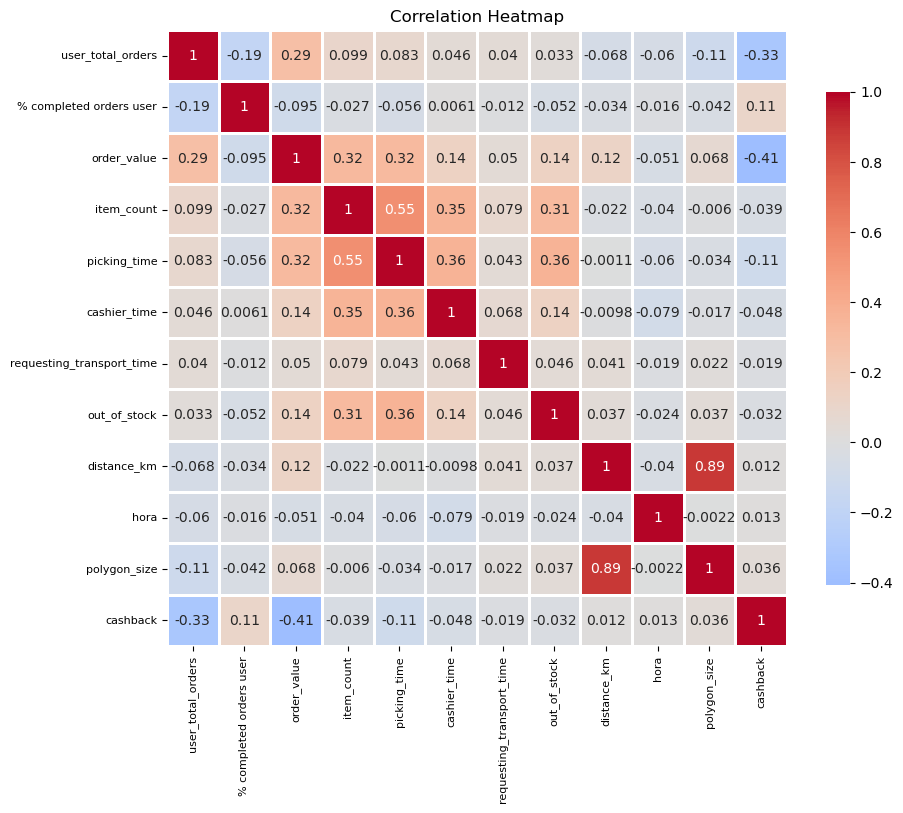

In [29]:
# Create a heatmap
plt.figure(figsize=(10, 8))
df_quan_corr = df_quan.corr(method = 'spearman' )
ax = sns.heatmap(df_quan_corr, annot=True, cmap='coolwarm', center=0,fmt='.2g',xticklabels='auto', yticklabels='auto',linewidth=.8,cbar_kws={"shrink": .8})
ax.tick_params(axis='both', which='both', labelsize=8)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Create a pairplot
sns.pairplot(df_quan)

In [ ]:
for col in df_quan.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    sns.histplot(df_quan[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f'Histogram for {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df_quan[col], ax=ax[1])
    ax[1].set_title(f'Boxplot for {col}')
    ax[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
df_quan.columns

In [ ]:
#Removing outliers for : % completed orders user, picking_time, cashier_time, t_06, polygon size, rapi_amount
columns = ['t04_picking_time', 't05_cashier_time',
           't06_requesting_rt_time', 'polygon_size', 'rappi_amount']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()
for col in columns:
    condition = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    outliers = pd.concat([outliers, df[condition]], ignore_index=True)


## 2. Exploratory Data Analysis (EDA) (univariate / bivariate analysis)

In [ ]:
#chi_squared for categorical
from scipy.stats import chi2_contingency

chi_squared_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Squared', 'P-Value'])

for var1 in df_cat:
    for var2 in df_cat:
        if var1 != var2:
          #if var2 =='bad_order':
            contingency_table = pd.crosstab(df[var1], df[var2])

            chi2, p, _, _ = chi2_contingency(contingency_table)


            new_row = pd.DataFrame({'Variable 1': [var1], 'Variable 2': [var2], 'Chi-Squared': [chi2], 'P-Value': [p]})

            chi_squared_results = pd.concat([chi_squared_results, new_row], ignore_index=True)

chi_squared_results


In [ ]:
#Checking for independance between our outcome bad_order and the categorical variables

In [ ]:
#chi_squared for categorical
from scipy.stats import chi2_contingency

chi_squared_results = pd.DataFrame(columns=['Variable', 'Chi-Squared', 'P-Value'])

outcome_variable = 'bad_order'

for var in df_cat:
        if var != outcome_variable:
            contingency_table = pd.crosstab(df[outcome_variable], df[var])

            chi2, p, _, _ = chi2_contingency(contingency_table)


            new_row = pd.DataFrame({'Variable': var, 'Chi-Squared': [chi2], 'P-Value': [p]})

            chi_squared_results = pd.concat([chi_squared_results, new_row], ignore_index=True)

            if p < 0.05:
              print(f"There is a significant association between {outcome_variable} and {var} (p-value = {p:.2f})")
            else:
              print(f"There is no significant association between {outcome_variable} and {var} (p-value = {p:.2f})")

#H0 there is no relathionship between the variables

chi_squared_results


In [ ]:
#Perfoming ANOVA TEST for mixed categorical and numerical values

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# List of numerical variables for the ANOVA tests
df_cuantitative = ['% completed orders user', 'order_value_usd', 'item_count', 't04_picking_time', 't05_cashier_time', 't06_requesting_rt_time', 'out_of_stock', 'distance_km', 'hora']

# Perform ANOVA for numerical variables
for num_var in df_cuantitative:
    formula = f'{num_var} ~ C(bad_order)'
    try:
        model = ols(formula, data=df).fit()
        anova_table = anova_lm(model)
        print(f"ANOVA table for {num_var} and bad_order:")
        print(anova_table)

        p_value = anova_table['PR(>F)'][0]
        if p_value < 0.05:
            print(f"There is a significant difference between the means of the groups defined by bad_order for {num_var} (p-value = {p_value:.2f})")
        else:
            print(f"There is no difference between the means of k groups")

        print("=" * 40)

    except Exception as e:
        print(f"Error for {num_var} and bad_order: {str(e)}")



#

# 4. Machine Learning


In [ ]:
# Feature engineering
df_quan

For this part we are going to start put the data in a standarization and onehot encoding so the data is ready to be inserted in the modeling. For it, we are going to use the Pipeline method

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class VariableSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X , y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
columns_quan = list(df_quan.columns)

In [ ]:
columns_quan


In [ ]:
#quantitative
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline(
    [
     ('selector', VariableSelector(columns_quan)),
     ('std_scaler', StandardScaler())
    ]
    )



In [ ]:
#It is being checked in the case of the categorical variables, which values can be apprved for a OHE method or label encoding

df_cat_oh = ['country','payment_method','city','vehicle_type','store_category','use_credit']
df_cat_le = ['district_name','brand_group']



In [ ]:
from sklearn.preprocessing import OneHotEncoder as OHE

cuali_pipeline_ohe = Pipeline(

  [
    ('selector',VariableSelector(df_cat_oh)),
    ('OHE_columns',OHE(sparse=False))

  ]

)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder as OE

cuali_pipeline_le =Pipeline(

                            [
                             ('selector',VariableSelector(df_cat_le)),
                             ('LE_columns', OE())
                            ]

)

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline =FeatureUnion(
    transformer_list=[
        ('num_pipeline', quanti_pipeline),
        ('ohe_pipeline',cuali_pipeline_ohe),
        ('le_pipeline',cuali_pipeline_le)
                      ]
)

Once that is defined the Pipeline, to do the adjustements on the data. It is going to be retrieved from the main dataset the y to be predicted


In [ ]:
x_df = full_pipeline.fit_transform(df)


In [ ]:
X = x_df
y = df['bad_order']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,shuffle=True,stratify = y)

Now that we splited our data, we will apply 3 models on our categorical outcome (Logistic regression, Classification Tree, Random Forest)

+ LOGISTICS REGRESSION

In [ ]:
#Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = None, solver = 'newton-cholesky')
logreg.fit(X_train, y_train)

#Predicting the test set results
lr_pred = logreg.predict(X_test)

In [ ]:
#Calculating the accuracy
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
#Checking crossvalidated performance
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(logreg, X_test, y_test)
print(f"average cross validated score : {np.mean(cv_score)}")

In [ ]:
#Logistic Regression model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
confusion_matrix_lr = confusion_matrix(y_test, lr_pred, labels= logreg.classes_)
ConfusionMatrixDisplay(confusion_matrix_lr, display_labels = logreg.classes_).plot()
print(classification_report(y_test,lr_pred))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,roc_auc_score,cohen_kappa_score,roc_curve
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
sensitivity_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

#ROC Curve
lr_pred_prob= logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob[:,1])
lr_roc_auc = roc_auc_score(y_test, lr_pred_prob[:,1])


result_lr = pd.DataFrame([['Log. reg.',accuracy_lr, precision_lr, sensitivity_lr,f1_lr,lr_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_lr

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=' Logit Regression - ROC curve (area = {:.2f})'.format(lr_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

+ Decision Tree

In [ ]:
#Classification Tree Model Fitting

from sklearn.tree import DecisionTreeClassifier
# Initializing Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predicting on the test set
clf_pred = clf.predict(X_test)

In [ ]:
#Calculating the model accuracy, how often is the classifier correct ?
from sklearn.metrics import accuracy_score

print("Accuracy Decision Tree Classifier: {:.2f}".format(accuracy_score(y_test, clf_pred)))


In [ ]:
#Classification Tree Model performance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
confusion_matrix_clf = confusion_matrix(y_test, clf_pred, labels = clf.classes_)
ConfusionMatrixDisplay(confusion_matrix_clf, display_labels= clf.classes_).plot()
print(classification_report(y_test, clf_pred))

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
 clf,
 out_file=("order_simple.dot"),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [ ]:
!dot -Tpng hitters_simple.dot -o hitters_simple.png

In [ ]:
#from IPython.display import Image
#Image("order_simple.png")

In [ ]:
accuracy_clf = accuracy_score(y_test, clf_pred)
precision_clf = precision_score(y_test, clf_pred)
sensitivity_clf = recall_score(y_test, clf_pred)
f1_clf = f1_score(y_test, clf_pred)


#ROC Curve
clf_pred_prob= clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf_pred_prob[:,1])
clf_roc_auc = roc_auc_score(y_test, clf_pred_prob[:,1])


result_clf = pd.DataFrame([['decision tree',accuracy_clf, precision_clf, sensitivity_clf,f1_clf,clf_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_clf

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Tree Dec. -ROC curve (area = {:.2f})'.format(clf_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

+ Random Forest

In [ ]:
#Random Forest Model Fitting

from sklearn.ensemble import RandomForestClassifier
# Initializing Random Forest Classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf.fit(X_train, y_train)

#Predicting on the test set
rf_pred = rf.predict(X_test)

In [ ]:
#Calculating Random Forest model accuracy
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy Random Forest Classifier: {:.2f}".format(accuracy_rf))

In [ ]:
#Random Forest Classifier model performance
confusion_matrix_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
ConfusionMatrixDisplay(confusion_matrix_rf, display_labels= rf.classes_).plot()
print(classification_report(y_test, rf_pred))

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
sensitivity_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)


#ROC Curve
rf_pred_prob= rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_pred_prob[:,1])

result_rf = pd.DataFrame([['random forest',accuracy_rf, precision_rf, sensitivity_rf,f1_rf,rf_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_rf


After checking model performance accuracy (counts of correct classification) we can assume that our best model is Random Forest Classifier with 0.93% of correctly predicted predictions




In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Rand. forest -ROC curve (area = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

In [ ]:
resultados = pd.concat([result_lr, result_clf,result_rf], axis=0)
resultados

Results:


> Metrics

+ Overall the accuracy between all the models seems to be high (between 86 and 92%) which meant that the models have been a great deal into predicting if the order was labeled as a good one or bad one.
+ Precision: However, for this exercise it is most interesting to predict only the bad orders, to which this metric is most important. As it can be revised, the random forest model is the one with the best result out of the three. Which means that of the total predicted true bad orders, the model have an 86% of good prediction

+ Sensitivity: However, all the models had a bad ratio in this metric. This metric indicates that the of all the True orders labeled as bad order, only ;in the best case; was predicted 30% of this cases. To make the model more fit, it will be used the methods for reduce the overfitting of the models.


# Tuning model

In [ ]:


estimators = list(range(2, 50, 5))
sens_rf_num_estimators = []
accu_rf_num_estimators = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    sensitivity_rf = recall_score(y_test, rf_pred)
    accuracy_rf = accuracy_score(y_test, rf_pred)

    sens_rf_num_estimators.append(sensitivity_rf)
    accu_rf_num_estimators.append(accuracy_rf)


In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimators, sens_rf_num_estimators, marker='o', linestyle='-', color='b')
plt.plot(estimators,accu_rf_num_estimators, marker='x', linestyle='-', color='r')
plt.title('Sensitivity vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('%')
plt.grid(True)
plt.show()

In [ ]:

train_scores = []
valid_scores = []
leaves = list(range(2,30))
for leaf in leaves :
    dtr = RandomForestClassifier(min_samples_leaf = leaf)
    dtr.fit(X_train, y_train)
    train_scores.append(dtr.score(X_train, y_train))
    valid_scores.append(dtr.score(X_test, y_test))

plt.figure(figsize=(10,8))
plt.plot(leaves, train_scores)
plt.plot(leaves, valid_scores)
plt.xlabel("minimum samples per leaf")
plt.ylabel("score values")
plt.legend(["training scores", "validation scores"])
plt.show()

In [ ]:
train_scores = []
valid_scores = []
depths = list(range(2,40))
for depth in depths :
    dtr = RandomForestClassifier(max_depth = depth)
    dtr.fit(X_train, y_train)
    train_scores.append(dtr.score(X_train, y_train))
    valid_scores.append(dtr.score(X_test, y_test))

plt.figure(figsize=(10,8))
plt.plot(depths, train_scores)
plt.plot(depths, valid_scores)
plt.xlabel("maximum depth")
plt.ylabel("score values")
plt.legend(["training scores", "validation scores"])
plt.show()

+ GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 15)), 'min_samples_leaf': list(range(2,20))}

grid_search_cv = GridSearchCV(RandomForestClassifier(),
                              params,
                              verbose=1,
                              cv=3,
                              n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

In [ ]:

best_tree_model = grid_search_cv.best_estimator_
best_tree_model

In [ ]:
best_tree_model.fit(X_train,y_train)
best_tree_model.score(X_test,y_test)

In [ ]:
rfo_pred = best_tree_model.predict(X_test)

In [ ]:
from sklearn.tree import export_graphviz
tree_to_visualize = best_tree_model.estimators_[0]



In [ ]:
from sklearn.tree import export_graphviz
import subprocess

export_graphviz(
    tree_to_visualize,
    out_file="optimal_tree.dot",
    feature_names=None,
    class_names=None,
    filled=True
)


subprocess.call(['dot', '-Tpng', 'optimal_tree.dot', '-o', 'optimal_tree.png'])


In [ ]:
from IPython.display import Image

Image("optimal_tree.png")

In [ ]:
accuracy_rfo = accuracy_score(y_test, rfo_pred)
precision_rfo = precision_score(y_test, rfo_pred)
sensitivity_rfo = recall_score(y_test, rfo_pred)
f1_rfo = f1_score(y_test, rfo_pred)


#ROC Curve
rfo_pred_prob= clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rfo_pred_prob[:,1])
rfo_roc_auc = roc_auc_score(y_test, rfo_pred_prob[:,1])

result_rfo = pd.DataFrame([['optimal random forest',accuracy_rfo, precision_rfo, sensitivity_rfo,f1_rfo,rfo_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_rfo

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Rand. forest -ROC curve (area = {:.2f})'.format(rfo_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

# Unsupervised Learning

In [ ]:
'''Importing the needed libraries and getting a basic idea on the df_quant to see what we are looking at'''
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA
display(df[df_quan].head(3))
display(df[df_quan].info())
D = df[df_quan]
p = D.shape[1]
n = D.shape[0]
D = df[df_quan]
X = D.values

In [ ]:
'''Step 1: Try PCA to reduce dimensionality'''
# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns) #std_unit=True, doing standardized PCA)

# run PCA on X observed data
try:
    acp.fit(X)  # This will raise a ZeroDivisionError
except Exception as e:
    display(f"An error occurred: {e}")

In [ ]:
'''Step 2: Trouble shooting the error, which may indicate that there are columns that are zero'''
D_corr = D.corr()
ax = sns.heatmap(D_corr, annot=True, cmap='coolwarm', center=0,fmt='.1g',xticklabels='auto', yticklabels='auto',linewidth=.8,cbar_kws={"shrink": .8})
ax.tick_params(axis='both', which='both', labelsize=8)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
'''
Step 3: Issue becomes clear that the 't06_requesting_rt_time' is the problematic one because apparently
after data cleaning, all the values we kept are zero, which makes sense given the value means the time it took for
a delivery personnel to be assigned to the order, which is expected to be swifty in any delivery app.

Solution here: get rid off such column and do it again
'''
display(D.columns[5])
D1 = D.drop(columns = [D.columns[5]])
X1 = D1.values
p1 = D1.shape[1]
n1 = D1.shape[0]
acp = PCA(std_unit=True,row_labels=D1.index,col_labels=D1.columns) #std_unit=True, doing standardized PCA)
acp.fit(X1)  # This will raise a ZeroDivisionError
display(acp.col_labels)
display(acp.eig_) # each lamda k is in the first array, and then each lamda k divided by the sum of lamda k
#(proportion of variance explained by k),
# aka the variance explained by each component, is in the second row.
# The third row is the cumulative variance.
'''Looking at the cumulative variance, the most variable with the most variance only took 22%
of the total variance in the quantitative columns'''
display(acp.eig_.shape)

In [ ]:
'''Step 4: determining the threshold'''

# first the main plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(range(1,p1+1),acp.eig_[0],".-")
ax[0].set_xlabel("Nb. of factors")
ax[0].set_ylabel("Eigenvalues")
ax[0].set_title("Scree Plot")

# add Kaiser's threshold line
ax[0].plot([1,p1+3],[1,1],"r--",linewidth=1)

# print explained variance plot


ax[1].plot(range(0,p1+1),np.append(0,acp.eig_[2]),".-")
ax[1].set_xlabel("Nb. of factors")
ax[1].set_ylabel("% of explained variance")
ax[1].set_title("Explained Variance")

'''According to the plot, I decided to choose 4 as the threshold'''

In [ ]:
# Applying Barlett's test of Sphericity
try:
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
except:
    !pip install factor_analyzer
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(X1)
print(chi_square_value, p_value)

In [ ]:
# Computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p1-1)/(n1-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

In [ ]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p1,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p1+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p1+1),b,"r--",linewidth=1)

plt.show()

In [ ]:
'''Step 5: Variable representation'''
print(pd.DataFrame(acp.col_coord_[:,:4],index=D1.columns, columns=['F1','F2','F3','F4']))

In [ ]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))
acp.correlation_circle(num_x_axis=3,num_y_axis=4, figsize=(5,5))
'''Interpretation of the two dimensions'''
'''Three variables have a quite negative correlation with Dim 1, which are item_count, picking_time
and cashier_time. This means the speed the store can get those orders ready, which, unsurprisingly, also partially
comes down to the size of the order. There is clearly a size effect in this dimension'''
'''Two variables have a quite negative correlation with Dim 2, which are distance_km and order_value_USD. This means
that whether the order is cheap and within a shorter distance, most likely being some everyday shopping needs versus
some more expensive order traveling a longer distance. This shows a shape effect while Dim 1 shows a size effect'''
'''Two variables have a quite strong positive correlation with Dim 3, namely 'hora' which means hour, meaning the
time in the day, and 'out_of_stock'. This indicates that this axis talks about a general time variation, since the
early an order is placed, the less likely that the specific item a customer wants would be sold out.'''
'''The fourth dimension has a very high correlation on '% completed orders user' which could just be interpreted as
that specific variable.'''

In [ ]:
# Cos² if the variables on the two first factors
print(pd.DataFrame(acp.col_cos2_[:,:4],index=D1.columns, columns=['F1','F2','F3','F4']))

In [ ]:
# Cumulated Cos² on the two first factors
print(pd.DataFrame(np.cumsum(acp.col_cos2_[:,:4],axis=1),index=D1.columns, columns=['F1','F2',"F3",'F4']))

In [ ]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:4],index=D1.columns, columns=['F1','F2',"F3",'F4']))

In [ ]:
# chart of the individuals
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(7,7))

In [ ]:
# chart of the individuals
acp.mapping_row(num_x_axis=3,num_y_axis=4,figsize=(7,7))
'''From this factor map, we can see clearly that if we use Dim 3 and Dim 4 as our x1 and x2 axis and plot the data
points, there is a CLEAR tendency that different clusters are formed likely due to the variance introduced by
different rows, aka different groups of the customers behaving differently'''

In [ ]:
# creating a new data frame with the row coordinates of F1, F2, F3 and F4
df_row_coord = pd.DataFrame(np.cumsum(acp.row_coord_[:,:4],axis=1),index=D1.index, columns=['F1','F2','F3',"F4"])
df_row_coord.head(5)

In [ ]:
mask = df_row_coord['F1'] == df_row_coord['F1'].min()
df_row_coord.loc[df_row_coord[mask].index, :]

In [ ]:
'''Clustering'''
'''Plotting them one axis by another first'''
sns.pairplot(df_row_coord)

In [ ]:
df_row_coord1 = df_row_coord.copy()
if df_row_coord1.shape[0] == y.shape[0]:
   df_row_coord1['bad_order'] = y
    sns.pairplot(df_row_coord1, hue='bad_order')


In [ ]:
display(df_row_coord.head(3))
display(df_row_coord1.head(3))
display(df_row_coord1['bad_order'].mean())

In [ ]:
'''clustering with K-Means'''
from sklearn.cluster import KMeans

X = df_row_coord.values

km = KMeans(n_clusters = 2, init = 'k-means++' , n_init = 10, max_iter = 300, random_state = 0, tol = 0.0001)

y_km = km.fit_predict(X)

In [ ]:
km.labels_
from collections import Counter
unique_counts = Counter(km.labels_)
display(unique_counts)

In [ ]:
#Added the clustering info to the dataframe, but it won't affect the original X since X was done in the front as
#X = df_row_coord.values
df_row_coord['Y_KMean'] = y_km
sns.pairplot(df_row_coord, hue='Y_KMean')

In [ ]:
from sklearn.cluster import DBSCAN
eps_list = [0.2, 0.5, 1, 2, 2.2, 2.5, 2.7, 3, 4, 5]
for eps_ in eps_list
    DBSCAN_model = DBSCAN(eps = eps_, min_samples=5, metric='euclidean')
    DBSCAN_model.fit_predict(X)
    y_DBSCAN = DBSCAN_model.labels_
    df_row_coord['Y_DBSCAN'] = y_DBSCAN
    display(df_row_coord['Y_DBSCAN'].value_counts())
    sns.pairplot(df_row_coord.drop(columns = ['Y_KMean']), hue='Y_DBSCAN')